In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
import warnings
import yfinance as yf
from datetime import date 
from dateutil.relativedelta import *
warnings.filterwarnings("ignore")

start_date = date.today() + relativedelta(months=-12)
end_str = str(date.today())
indx_code = 'amd'

start_str = str(start_date)
print("start_date : "+ start_str , " , end_date : " + end_str)

start_date : 2022-11-30  , end_date : 2023-11-30


In [39]:
def loadFinanceDF(finIndx):
    df = yf.download(finIndx , start=start_str, end=end_str)
    df = df.drop(['Open', 'High', 'Low', 'Adj Close'], axis=1)
    df.columns = ['close_price',  '_vol']
    return df

indx = loadFinanceDF(indx_code)
#msft_change = loadFinanceDF('msft')
#orcl_change = loadFinanceDF('orcl')

#indx = pd.concat([mstr_change, msft_change, orcl_change], axis=1)

indx.head()

[*********************100%%**********************]  1 of 1 completed


,close_price,_vol
Date,,
2022-11-30,77.629997,88468400
2022-12-01,77.480003,59833400
2022-12-02,74.980003,64377200
2022-12-05,73.620003,47022200
2022-12-06,70.269997,64965200


In [40]:
indx_cl = indx[['close_price']]
indx_cl_pct = indx_cl.pct_change()*100
indx_cl_pct.columns = ['indx_cl_pct']
indx_vol = indx[['_vol']]
indx_new = pd.concat([indx_cl,  indx_vol, indx_cl_pct], axis = 1)

indx_new = indx_new.dropna()
indx_new.head()

,close_price,_vol,indx_cl_pct
Date,,,
2022-12-01,77.480003,59833400,-0.193216
2022-12-02,74.980003,64377200,-3.226639
2022-12-05,73.620003,47022200,-1.813818
2022-12-06,70.269997,64965200,-4.550402
2022-12-07,70.139999,59180100,-0.184997


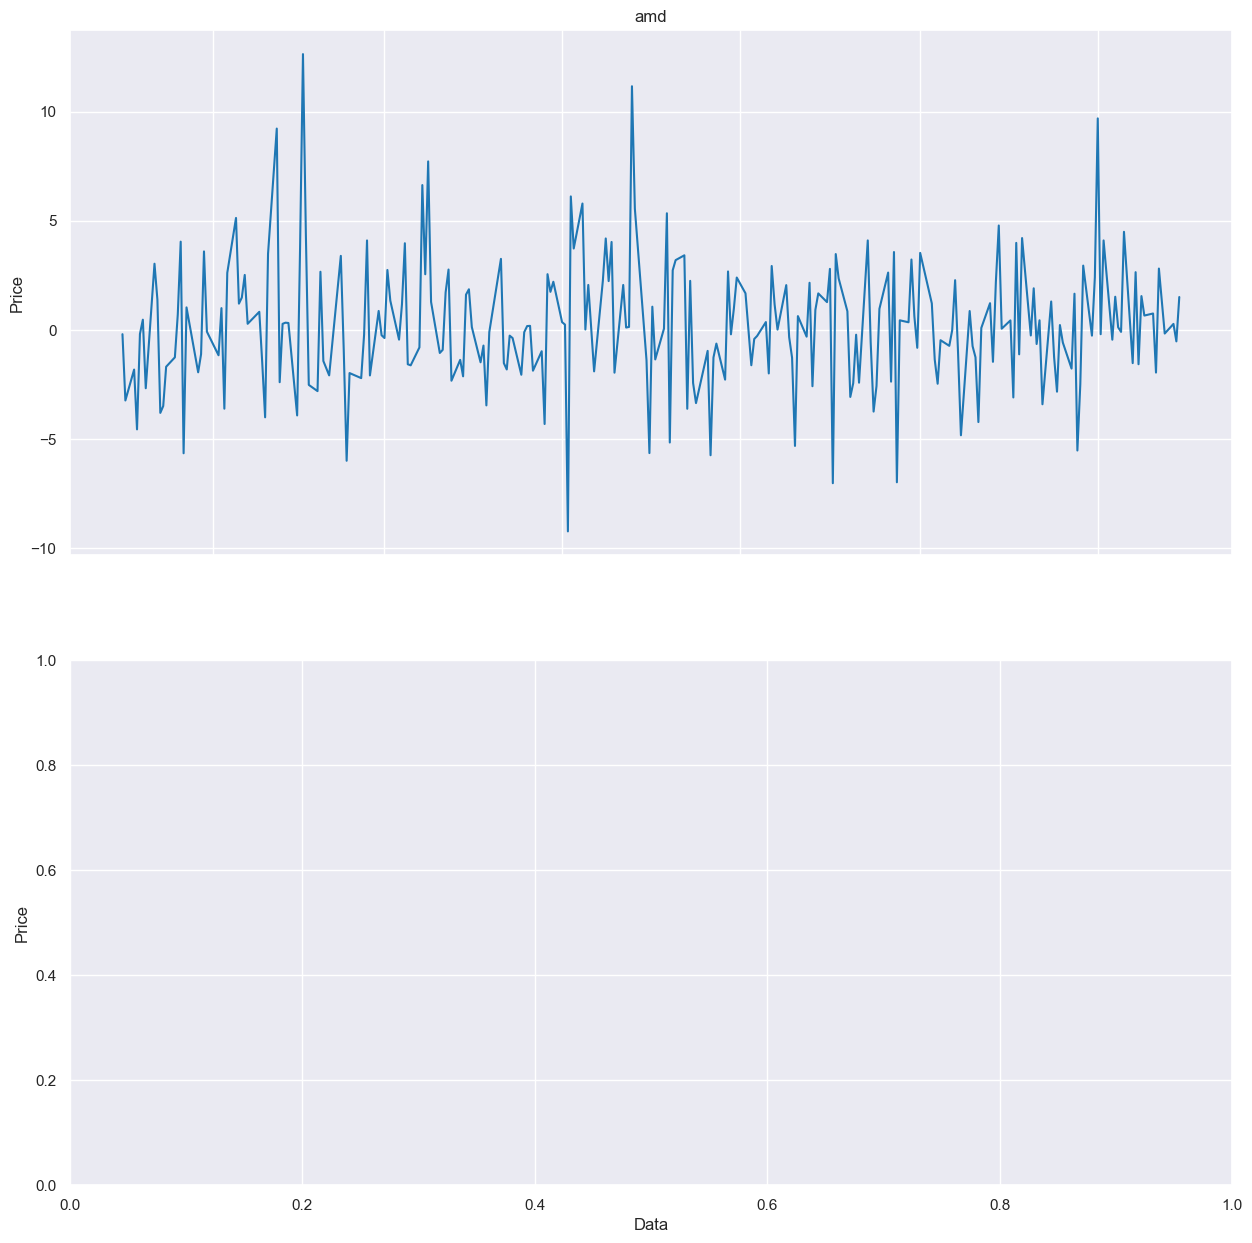

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(indx_new.index, indx_new['indx_cl_pct'], 'tab:blue')
axs[0].set_title(indx_code)

for ax in axs.flat:
    ax.set(xlabel='Data', ylabel='Price')

for ax in axs.flat:
    ax.label_outer()

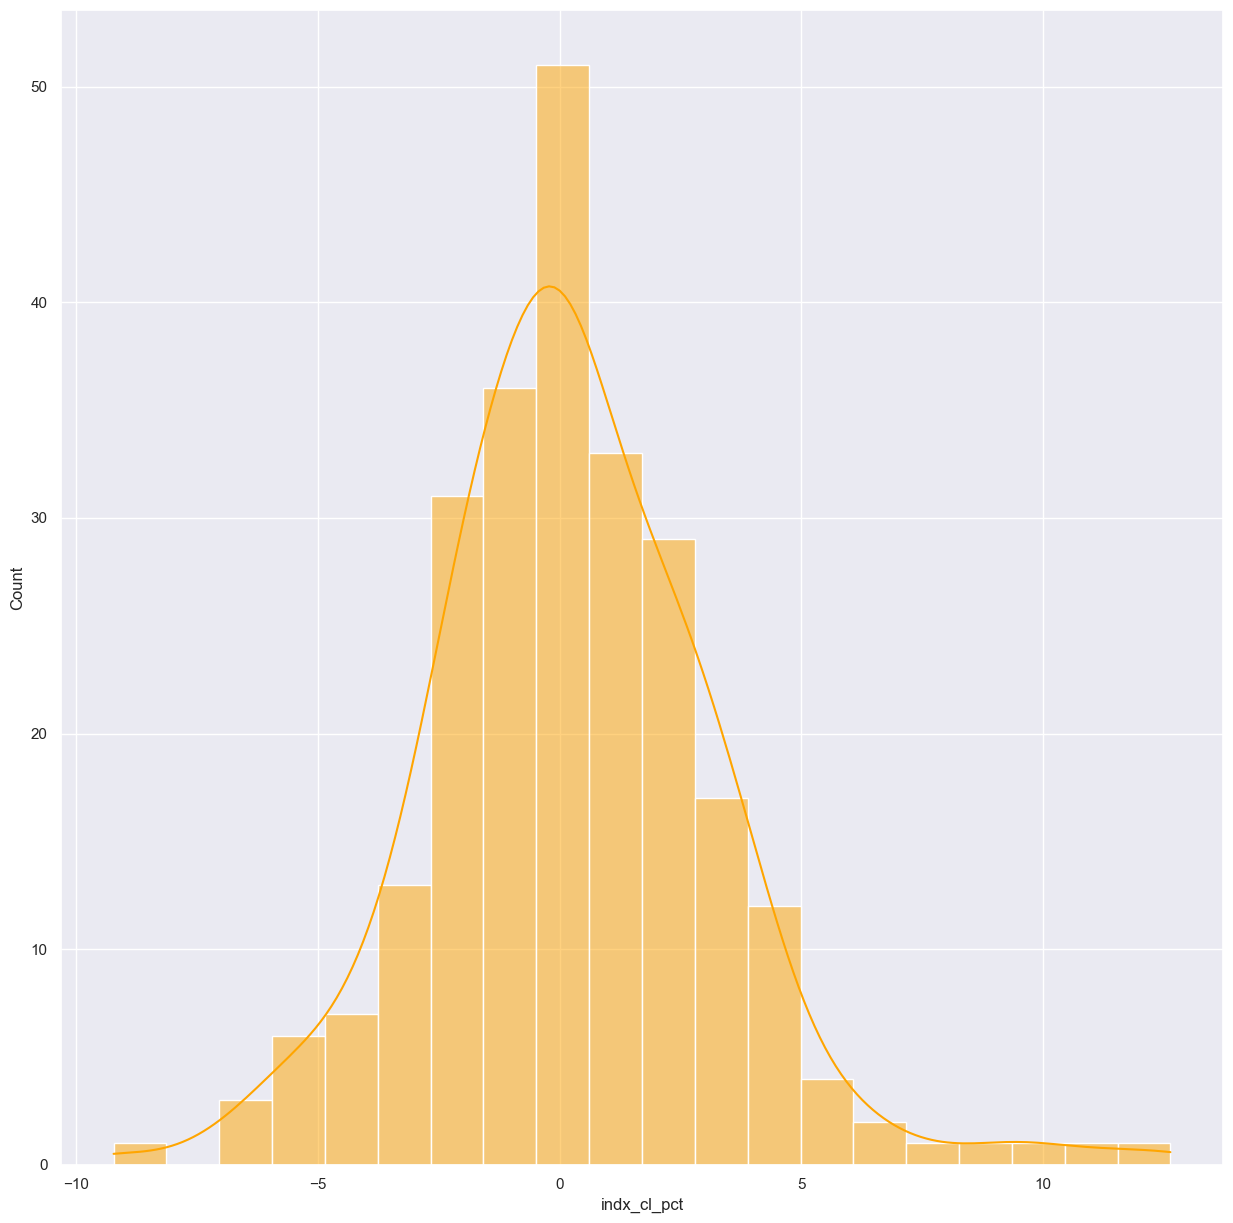

In [42]:
import seaborn as sns
 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 1, figsize=(15,15))

sns.histplot(data=indx_new['indx_cl_pct'], kde=True, color="orange")

plt.show()